In [59]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, cross_val_score


In [60]:
#importing the file
df = pd.read_csv('train.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [62]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [63]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [64]:
df.drop(["Unnamed: 0","id"],axis=1, inplace=True) #drop unamed:0 and ID column

In [65]:
df.isna().sum() #findimg missing values

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [66]:
#Filling missing values
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean())

In [67]:
df.isna().sum() #mean of missing values


Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [68]:
df.shape

(103904, 23)

In [69]:
df.size

2389792

In [70]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [71]:
#DUPLICATES
dup = df[df.duplicated()]
dup
#No duplicates found

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


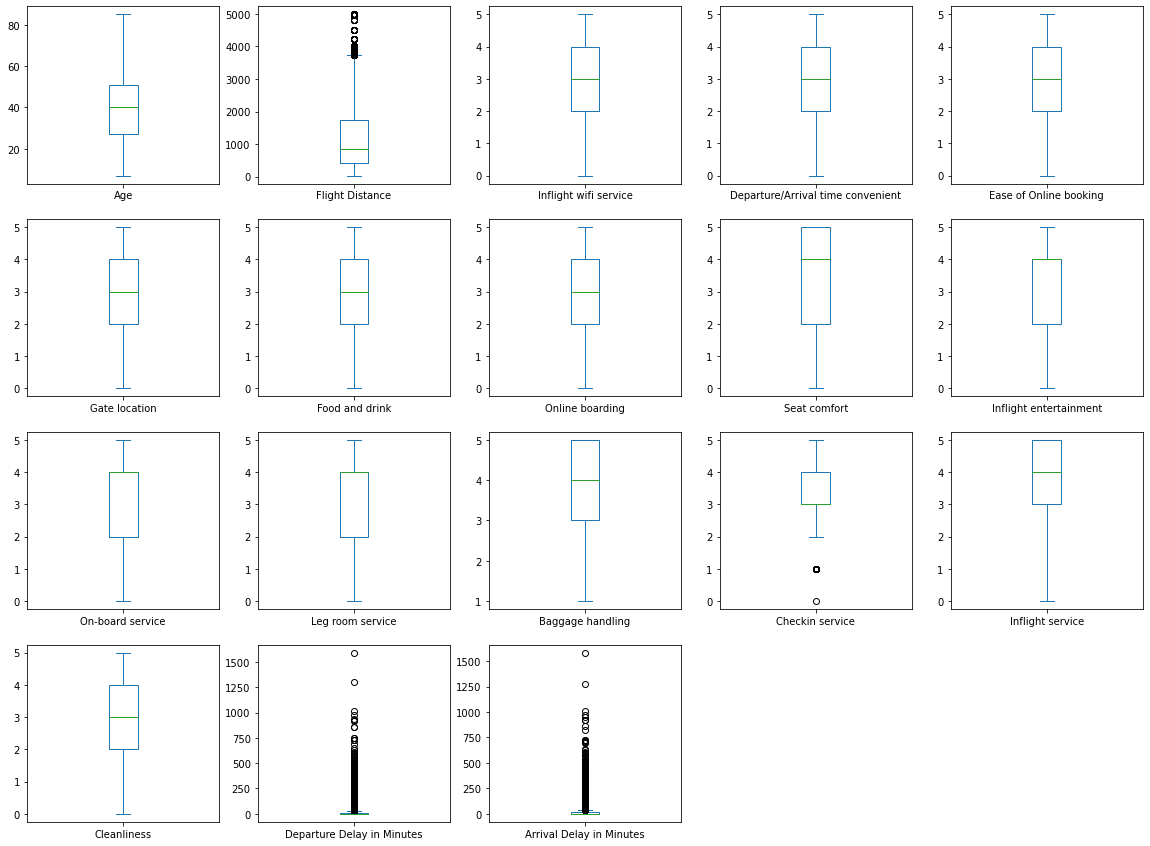

In [72]:
#Box plot for outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (4,5))
plt.show()

<AxesSubplot:xlabel='Flight Distance'>

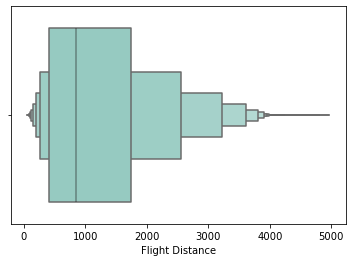

In [73]:
#finding outliers from the flight distance column
sns.boxenplot(x =df['Flight Distance'], palette = 'Set3')

In [74]:
df.loc[df['Flight Distance'] > 3735].shape 

(2302, 23)

In [75]:
#removing the outliers found in the flight distance column
outliers_distance = df[df['Flight Distance'] > 3735]
df.drop(outliers_distance.index, inplace = True) 

<AxesSubplot:xlabel='Departure Delay in Minutes'>

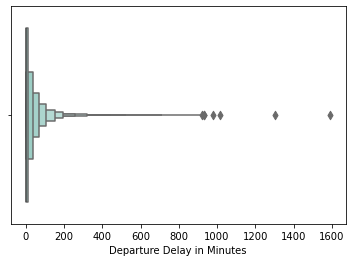

In [76]:
#finding outliers from departure delay column
sns.boxenplot(x =df['Departure Delay in Minutes'], palette = 'Set3')

In [77]:
df.loc[df['Departure Delay in Minutes'] > 950].shape

(4, 23)

In [78]:
#removing the outliers found in the Departure Delay in Minutes column
outliers_departure = df[df['Departure Delay in Minutes'] > 950]
df.drop(outliers_departure.index, inplace = True)

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

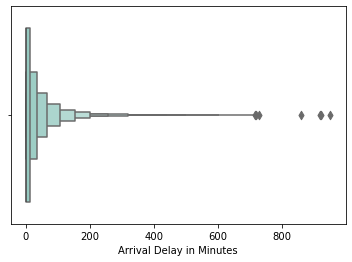

In [79]:
#rfinding outliers from arrival delay column
sns.boxenplot(x =df['Arrival Delay in Minutes'], palette = 'Set3')

In [80]:
df.loc[df['Arrival Delay in Minutes'] > 635].shape

(11, 23)

In [81]:
#removing the outliers found in the Arrival Delay in Minutes column
outlier_arrival = df[df['Arrival Delay in Minutes'] > 635]
df.drop(outlier_arrival.index, inplace = True)

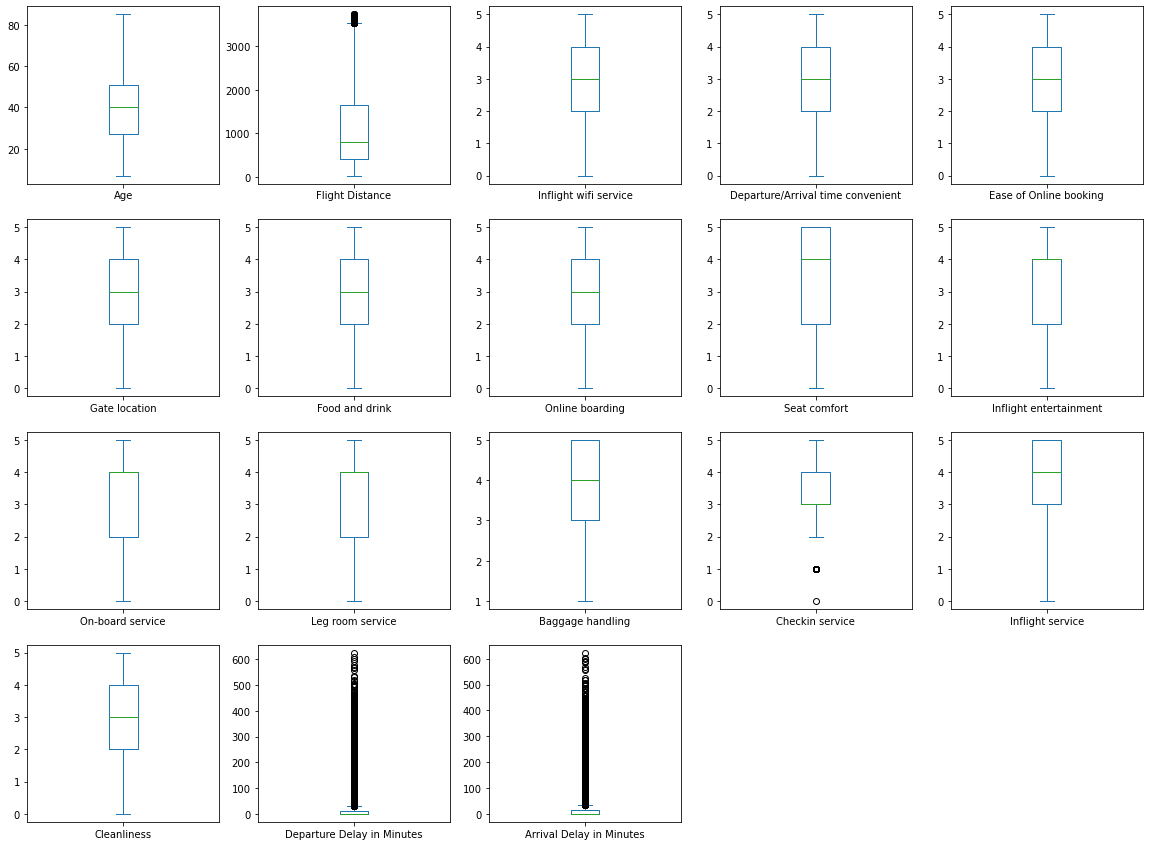

In [82]:
#checking for outliers again
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (4,5))
plt.show()

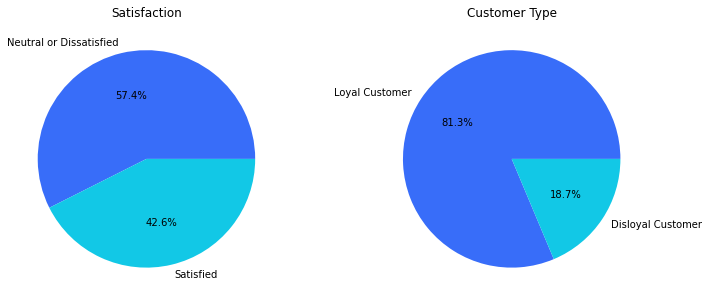

Counter({'neutral or dissatisfied': 58330, 'satisfied': 43257})
Counter({'Loyal Customer': 82622, 'disloyal Customer': 18965})


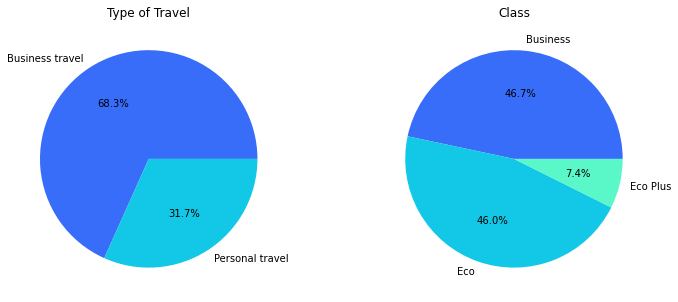

Counter({'Business travel': 69379, 'Personal Travel': 32208})
Counter({'Business': 47402, 'Eco': 46700, 'Eco Plus': 7485})


In [83]:
# Create four pie charts
fig, axes = plt.subplots(1, 2,  figsize=(12, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
colors = sns.color_palette('rainbow')
plt.pie(df['satisfaction'].value_counts(), labels = ['Neutral or Dissatisfied', 'Satisfied'], colors = colors, autopct='%.1f%%')
plt.title('Satisfaction')

ax1 = plt.subplot2grid((1,2),(0,1))
color2 = sns.color_palette('rainbow')
plt.pie(df['Customer Type'].value_counts(), labels = ['Loyal Customer', 'Disloyal Customer'], colors = color2, autopct='%.1f%%')
plt.title('Customer Type')
plt.show()

print(Counter(df['satisfaction']))
print(Counter(df['Customer Type']))


fig, axes = plt.subplots(1, 2,  figsize=(12, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(df['Type of Travel'].value_counts(), labels = ['Business travel', 'Personal travel'], colors = color2, autopct='%.1f%%')
plt.title('Type of Travel')

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(df['Class'].value_counts(), labels = ['Business', 'Eco', 'Eco Plus'], colors = color2, autopct='%.1f%%')
plt.title('Class')
plt.show()

print(Counter(df['Type of Travel']))
print(Counter(df['Class']))

In [84]:
numerical_columns = [num_columns for num_columns in df.columns if df[num_columns].dtypes != 'O']

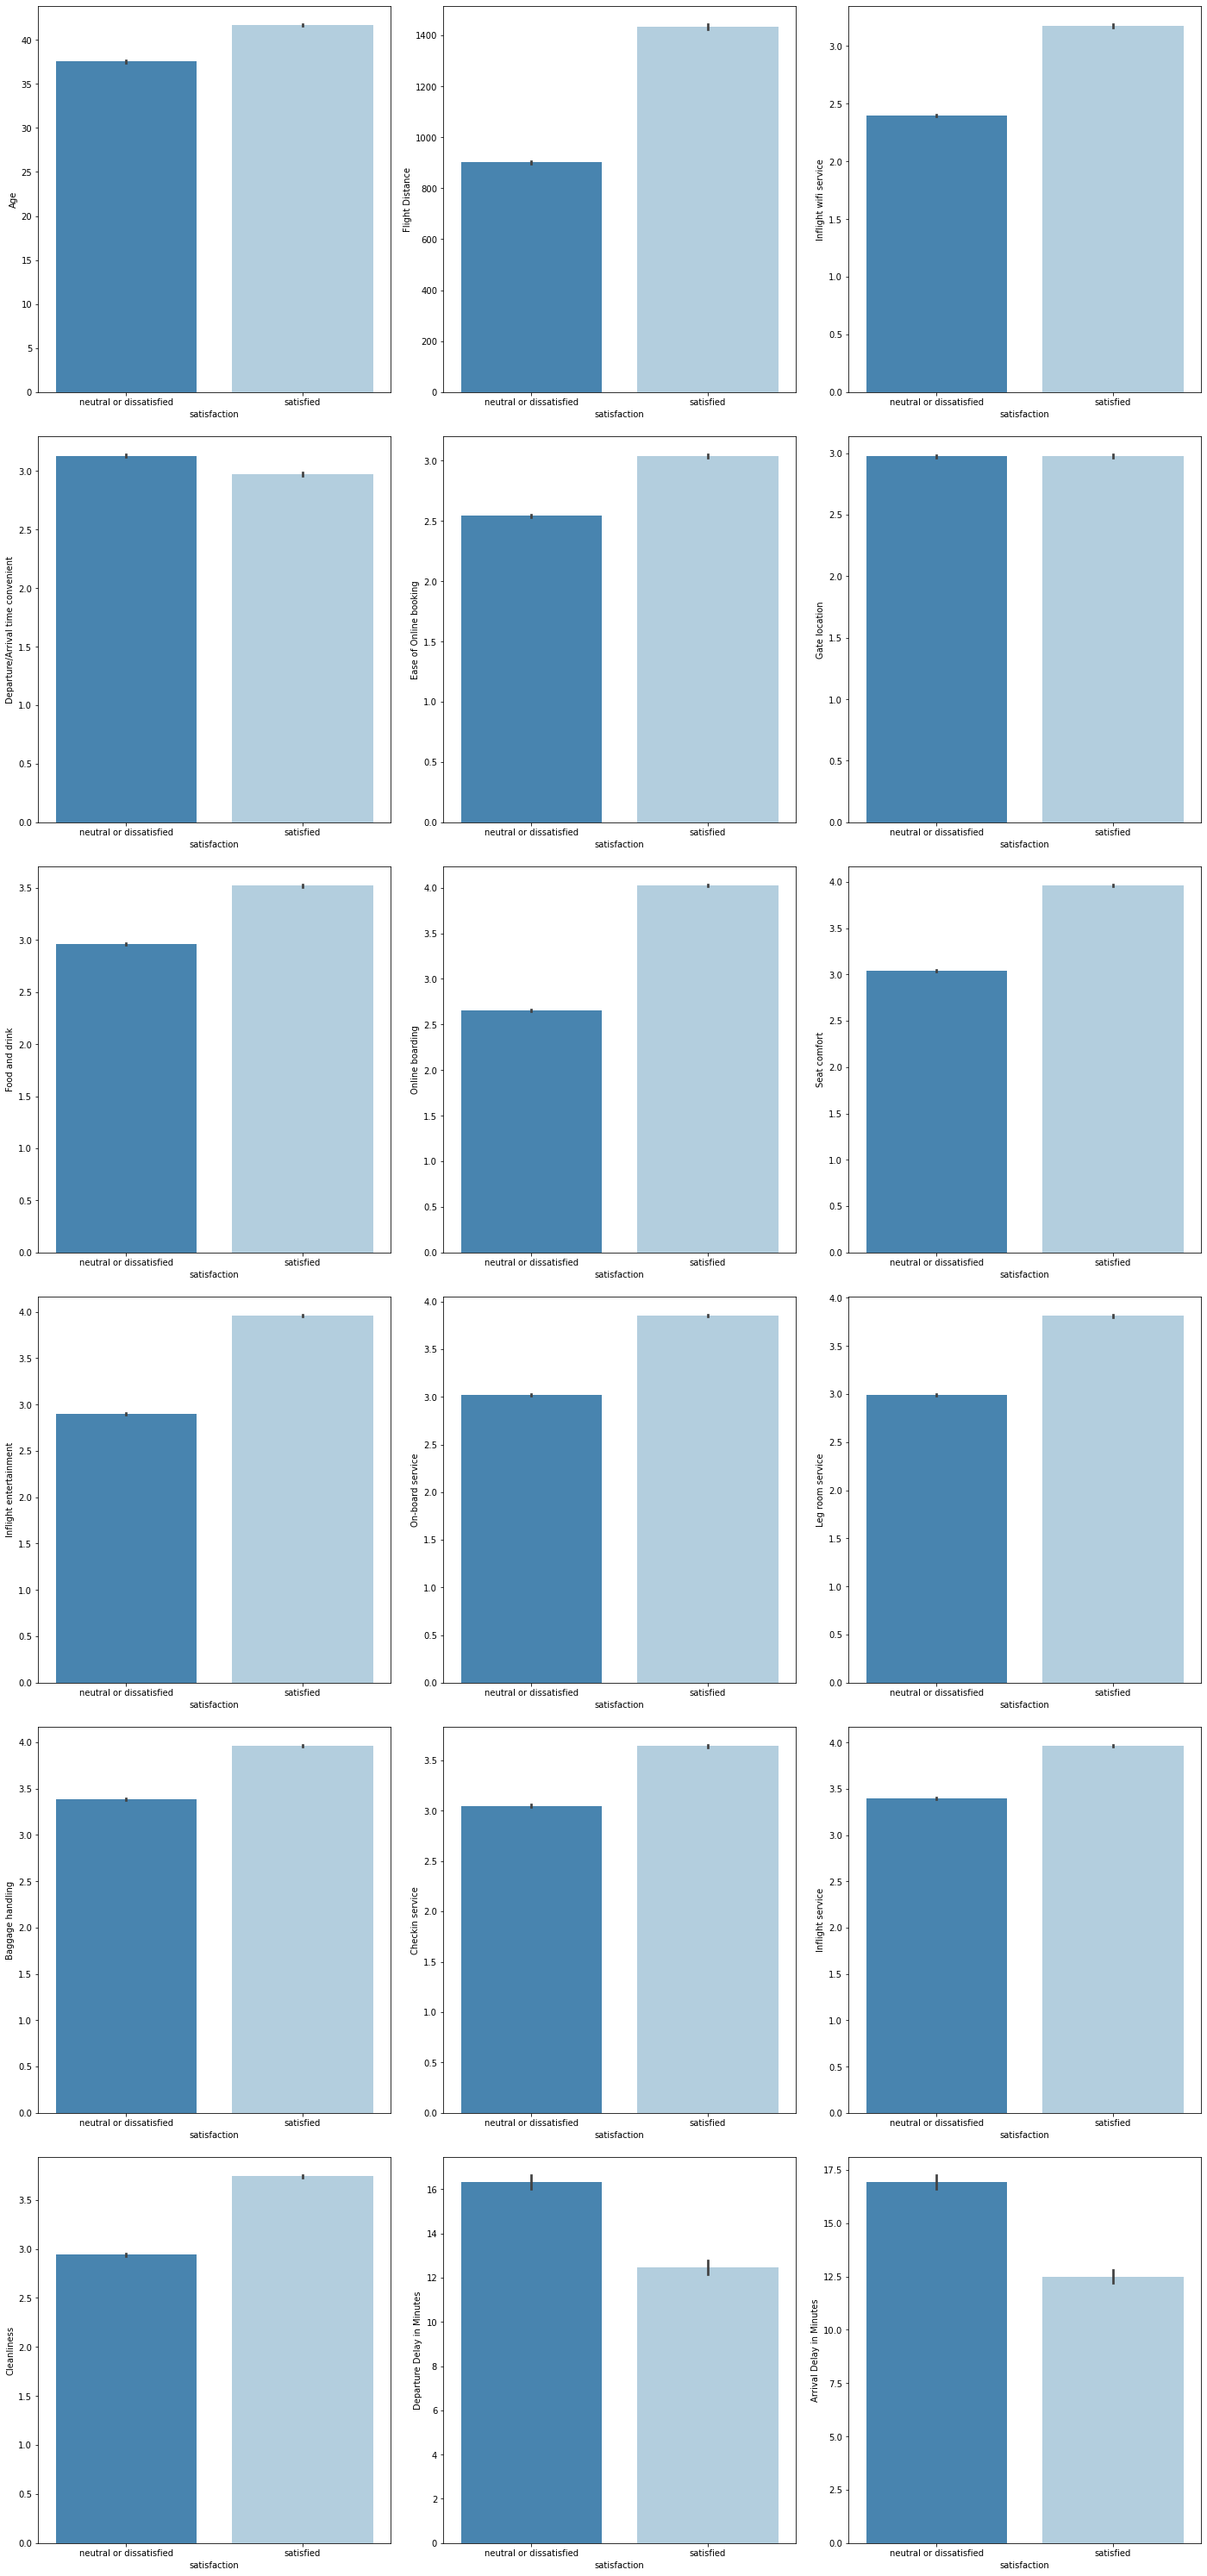

In [85]:
#Barplot fo numerical columns
def detail_barplot():
    fig, axs = plt.subplots(6, 3, figsize=(20, 42))
    fig.tight_layout(pad=3.0)
    for col, ax in zip(numerical_columns,axs.ravel()):
        ax = sns.barplot(ax=ax,data=df,x='satisfaction',y=col, palette='Blues_r')

detail_barplot()

In [86]:
categorical_columns = [cat_columns for cat_columns in df.columns if df[cat_columns].dtypes == 'O']

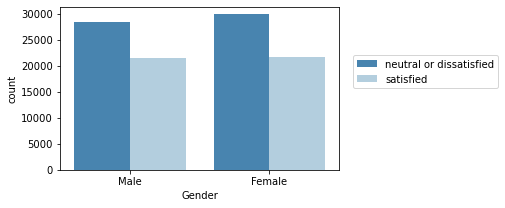

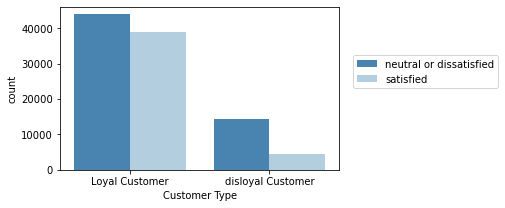

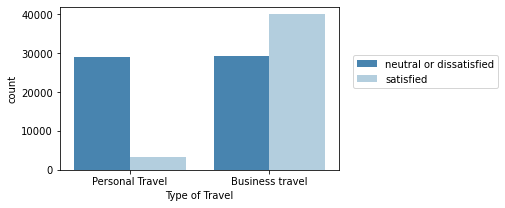

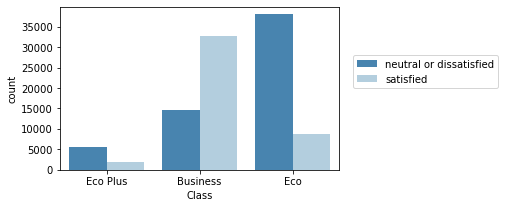

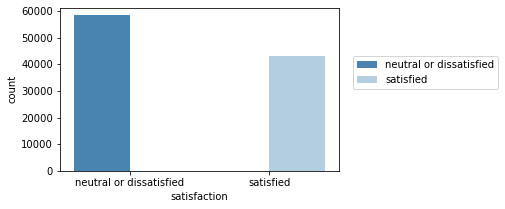

In [87]:
#plot for categorical_columns
for col in categorical_columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='Blues_r')
    plt.legend(loc=(1.05,0.5))

In [88]:
#Dropping unnecessary columns
#Dropping age, gender and gate location
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

In [89]:
print(f'Total number of rows in the dataset: {df.shape[0]}')
print(f'Total number of columns in the dataset: {df.shape[1]}')

Total number of rows in the dataset: 101587
Total number of columns in the dataset: 20


In [90]:
#Focusing on satisfaction and flight delays
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction
neutral or dissatisfied    16.932151
satisfied                  12.499187
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

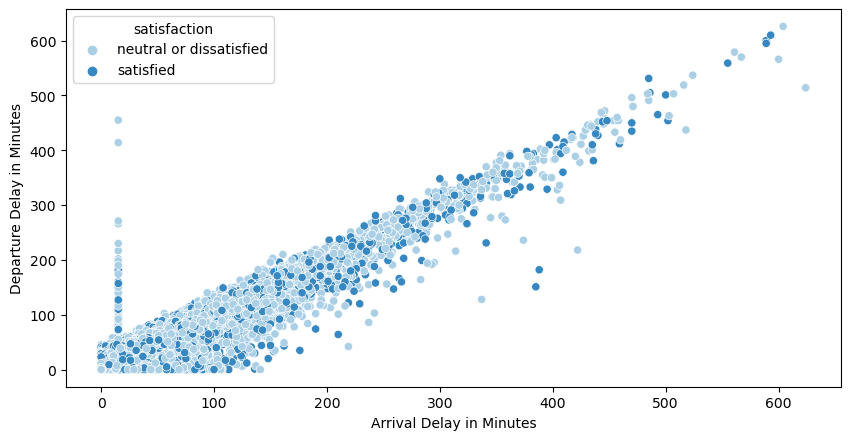

In [91]:
#Scatterplot to understand the some relations between columns more
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='Blues', alpha=1.0)

#linear relationship between 'Arrival Delay in Minutes' and 'Departure Delay in Minutes'

(0.0, 700.0)

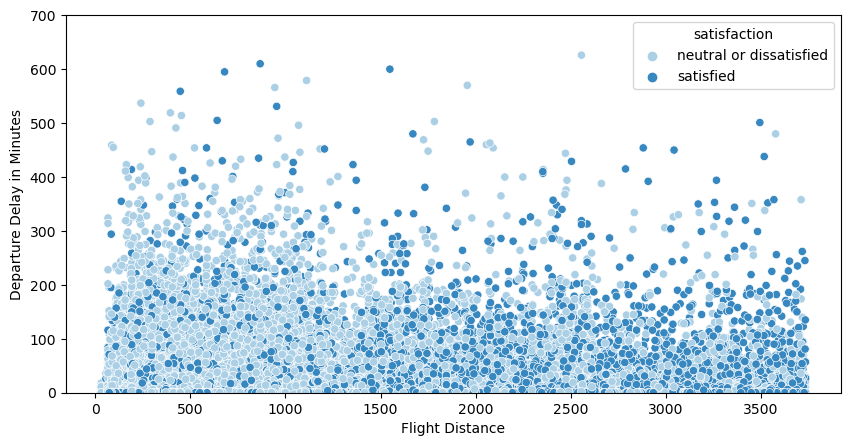

In [92]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='Blues', alpha=1.0)
plt.ylim(0,700)

In [93]:
df.head()

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Personal Travel,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,disloyal Customer,Business travel,Business,235,3,2,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Loyal Customer,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Loyal Customer,Business travel,Business,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Loyal Customer,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [94]:
categorical = ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']
#Count number of distinct elements in specified axis.
DistinctElements = 0
for column in categorical:
    row = df[column].nunique()
    if row > DistinctElements:
        DistinctElements = row


In [95]:
# Categorical to numerical value for modeling
for column in categorical:
    numerical = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, numerical], axis=1)
    df.drop(column, inplace=True, axis=1)

df.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,460,3,4,3,5,3,5,5,4,3,...,4,5,5,25,18.0,0,1,0,1,0
1,235,3,2,3,1,3,1,1,1,5,...,1,4,1,1,6.0,1,0,0,0,0
2,1142,2,2,2,5,5,5,5,4,3,...,4,4,5,0,0.0,0,0,0,0,1
3,562,2,5,5,2,2,2,2,2,5,...,1,4,2,11,9.0,0,0,0,0,0
4,214,3,3,3,4,5,5,3,3,4,...,3,3,3,0,0.0,0,0,0,0,1


<AxesSubplot:>

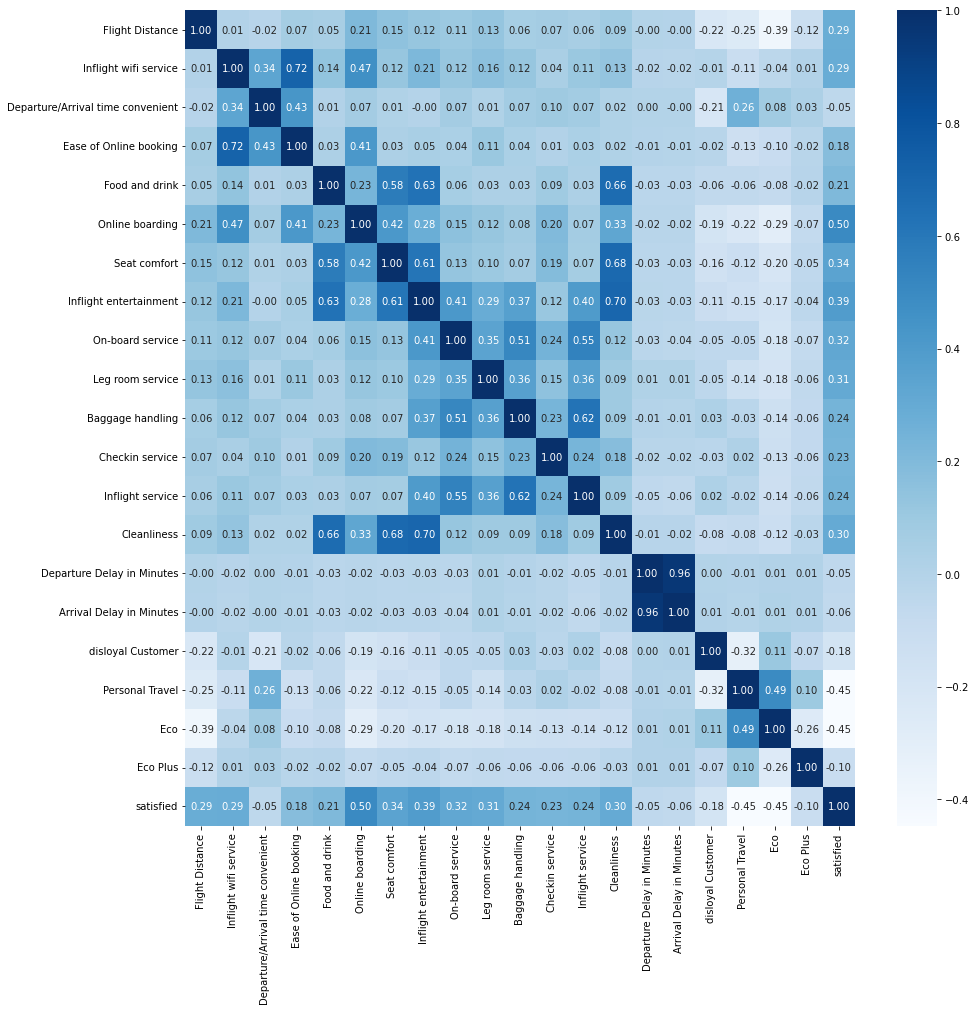

In [96]:
#Crearing heatmap to visualize all numerical values
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'Blues',annot = True, fmt='.2f')

In [97]:
df

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,disloyal Customer,Personal Travel,Eco,Eco Plus,satisfied
0,460,3,4,3,5,3,5,5,4,3,...,4,5,5,25,18.0,0,1,0,1,0
1,235,3,2,3,1,3,1,1,1,5,...,1,4,1,1,6.0,1,0,0,0,0
2,1142,2,2,2,5,5,5,5,4,3,...,4,4,5,0,0.0,0,0,0,0,1
3,562,2,5,5,2,2,2,2,2,5,...,1,4,2,11,9.0,0,0,0,0,0
4,214,3,3,3,4,5,5,3,3,4,...,3,3,3,0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,192,2,1,2,2,2,2,2,3,1,...,2,3,2,3,0.0,1,0,1,0,0
103900,2347,4,4,4,2,4,5,5,5,5,...,5,5,4,0,0.0,0,0,0,0,1
103901,1995,1,1,1,4,1,5,4,3,2,...,5,5,4,7,14.0,1,0,0,0,0
103902,1000,1,1,1,1,1,1,1,4,5,...,5,4,1,0,0.0,1,0,1,0,0


In [98]:
x = df.iloc[:, 0:20].values
y = df.iloc[:,20].values

In [99]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,460.0,3.0,4.0,3.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0.0,1.0,0.0,1.0
1,235.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0
2,1142.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,562.0,2.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0.0,0.0,0.0,0.0
4,214.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,0
4,1


In [101]:
#BUILDING MODEL

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [102]:
print(x_train.shape, x_test.shape)

(81269, 20) (20318, 20)


LogisticRegression(random_state=42)
Logistic Regression Training Accuracy: 0.8751430434729109

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11741
           1       0.87      0.83      0.85      8577

    accuracy                           0.88     20318
   macro avg       0.88      0.87      0.87     20318
weighted avg       0.88      0.88      0.88     20318

Accuracy: 0.8761196968205532
Precision: 0.8727854330708661
Recall: 0.8270957211146088
F1 Score: 0.8493265489374437

Roc Auc Score: 0.8695141325954613
Confusion Matrix: [[10707  1034]
 [ 1483  7094]]
Training score: 0.875
Test score: 0.876


<AxesSubplot:>

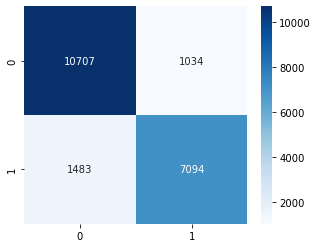

In [103]:
#Using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42, max_iter=100, n_jobs= None)
print(model.fit(x_train, y_train.values.ravel()))
print('Logistic Regression Training Accuracy:', model.score(x_train, y_train))
print()
#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, model.predict(x_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, model.predict(x_test)))
print(F'Precision:', precision_score(y_test, model.predict(x_test)))
print(F'Recall:', recall_score(y_test, model.predict(x_test)))
print(F'F1 Score:', f1_score(y_test, model.predict(x_test)))
print()
#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, model.predict(x_test)) )
print( F'Confusion Matrix:',confusion_matrix(y_test, model.predict(x_test)) )
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print("Training score: {:.3f}".format(train_score))
print("Test score: {:.3f}".format(test_score))
#Figure for confusion_matrix
predictionsModel = model.predict(x_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsModel), cmap = "Blues", annot=True, fmt = '.0f')


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)
xgboost Training Accuracy: 0.9728432735729491

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11741
           1       0.97      0.93      0.95      8577

    accuracy                           0.96     20318
   macro avg       0

<AxesSubplot:>

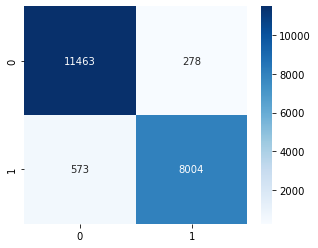

In [104]:
#Using xgboostr method of ensemble class to use xgboostClassification algorithm
import xgboost

xgbst= xgboost.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 6, n_estimators=100)
print(xgbst.fit(x_train, y_train))
print('xgboost Training Accuracy:', xgbst.score(x_train, y_train))
print()
#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, xgbst.predict(x_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, xgbst.predict(x_test)))
print(F'Precision:', precision_score(y_test, xgbst.predict(x_test)))
print(F'Recall:', recall_score(y_test, xgbst.predict(x_test)))
print(F'F1 Score:', f1_score(y_test, xgbst.predict(x_test)))
#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, xgbst.predict(x_test)) )
print( F'Confusion Matrix:',confusion_matrix(y_test, xgbst.predict(x_test)) )
train_score = xgbst.score(x_train, y_train)
test_score = xgbst.score(x_test, y_test)
print("Training score: {:.3f}".format(train_score))
print("Test score: {:.3f}".format(test_score))

#Figure for confusion_matrix
predictionsXgbst = xgbst.predict(x_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsXgbst), cmap = "Blues", annot=True, fmt = '.0f')



c:\Users\Amaan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()
Naive Bayes Training Accuracy: 0.8608694582190011

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     11741
           1       0.86      0.80      0.83      8577

    accuracy                           0.86     20318
   macro avg       0.86      0.85      0.86     20318
weighted avg       0.86      0.86      0.86     20318

Accuracy: 0.8601240279555075
Precision: 0.8590209089770877
Recall: 0.7999300454704442
F1 Score: 0.82842308621106

Roc Auc Score: 0.8520134002158455
Confusion Matrix: [[10615  1126]
 [ 1716  6861]]
Training score: 0.861
Test score: 0.860


<AxesSubplot:>

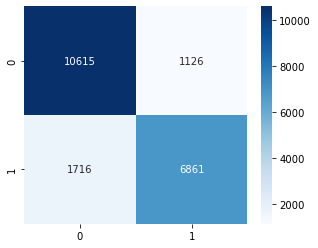

In [105]:
from sklearn.naive_bayes import GaussianNB
NVB  = GaussianNB()
NVB.fit(x_train, y_train.values.ravel())

print(NVB.fit(x_train, y_train))
print('Naive Bayes Training Accuracy:', NVB.score(x_train, y_train))
print()
#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, NVB.predict(x_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, NVB.predict(x_test)))
print(F'Precision:', precision_score(y_test, NVB.predict(x_test)))
print(F'Recall:', recall_score(y_test, NVB.predict(x_test)))
print(F'F1 Score:', f1_score(y_test, NVB.predict(x_test)))
print()
#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, NVB.predict(x_test)) )
print( F'Confusion Matrix:',confusion_matrix(y_test, NVB.predict(x_test)) )
train_score = NVB.score(x_train, y_train)
test_score = NVB.score(x_test, y_test)
print("Training score: {:.3f}".format(train_score))
print("Test score: {:.3f}".format(test_score))

#Figure for confusion_matrix
predictionsNVB = NVB.predict(x_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsNVB), cmap = "Blues", annot=True, fmt = '.0f')



KNeighborsClassifier()
K-Nearest neighbour Training Accuracy: 0.9500670612410637
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11741
           1       0.95      0.88      0.91      8577

    accuracy                           0.93     20318
   macro avg       0.93      0.92      0.93     20318
weighted avg       0.93      0.93      0.93     20318

Accuracy: 0.9294714046658136
Precision: 0.9497607655502392
Recall: 0.8794450273988574
F1 Score: 0.9132514074701858
Roc Auc Score: 0.9227307753466478
Confusion Matrix: [[11342   399]
 [ 1034  7543]]
Training score: 0.950
Test score: 0.929


<AxesSubplot:>

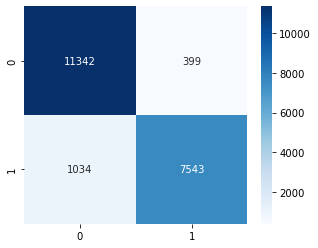

In [106]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
print(KNC.fit(x_train, y_train.values.ravel()))
print('K-Nearest neighbour Training Accuracy:', KNC.score(x_train, y_train))
#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, KNC.predict(x_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, KNC.predict(x_test)))
print(F'Precision:', precision_score(y_test, KNC.predict(x_test)))
print(F'Recall:', recall_score(y_test, KNC.predict(x_test)))
print(F'F1 Score:', f1_score(y_test, KNC.predict(x_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, KNC.predict(x_test)) )
print( F'Confusion Matrix:',confusion_matrix(y_test, KNC.predict(x_test)) )
train_score = KNC.score(x_train, y_train)
test_score = KNC.score(x_test, y_test)
print("Training score: {:.3f}".format(train_score))
print("Test score: {:.3f}".format(test_score))

#Figure for confusion_matrix
predictionsKNC = KNC.predict(x_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsKNC), cmap = "Blues", annot=True, fmt = '.0f')



In [107]:
#Accuracy Score
LRG = 0.876
XGB = 0.972
NVB = 0.860
KNN = 0.929

In [108]:
#Table comparing accuracy scores
print("Accuracy Results from worst to best")
final = pd.DataFrame([["Logistic Regression",LRG],["Naive Bayes",NVB],["XGboost",XGB],
                       ["KNeighbors Classifier",KNN]],
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=True)

final.style.background_gradient(cmap='winter')

Accuracy Results from worst to best


,Models,Accuracy Score
1,Naive Bayes,0.860000
0,Logistic Regression,0.876000
3,KNeighbors Classifier,0.929000
2,XGboost,0.972000


In [109]:
#import GridseachCV
from sklearn.model_selection import GridSearchCV

#GridSearch for Logistic Regression
clf = LogisticRegression()

#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(x_train, y_train.values.ravel())
print(gridsearch.best_score_)

0.875130730708878


c:\Users\Amaan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.87513073        nan 0.8750446         nan 0.87509381
        nan 0.87509381        nan 0.87509381        nan 0.87509381]
  warnings.warn(


In [110]:
#GridSearch for Nearest Neighbors Classifier
knn_range =  list(range(1,20))
param_grid = dict()

grid = GridSearchCV(KNC, param_grid = param_grid)
grids= grid.fit(x_train,y_train.values.ravel())
0
print(grid.best_score_)

0.9284967095188893


In [111]:
x_train = df.drop(['satisfied'], axis=1)
y_train = df['satisfied']
x_test = df.drop(['satisfied'], axis=1)
y_test = df['satisfied']

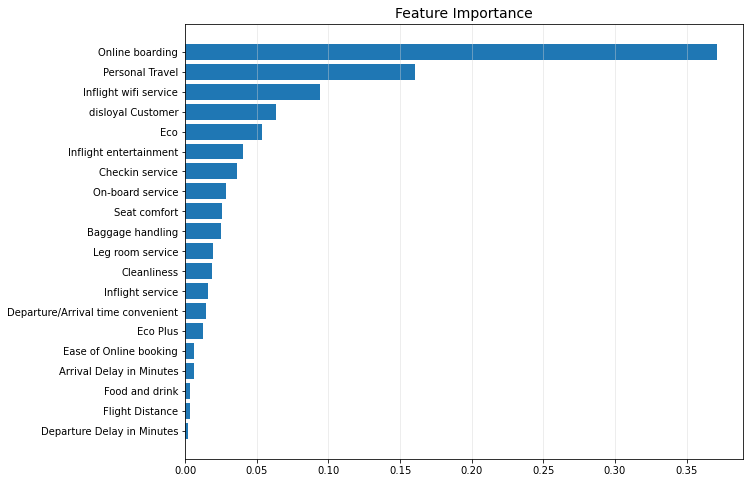

In [112]:
#GridSearchCV for XGBoost and a graph comparing all features
parameters_grid = {
     'random_state': [0,42], 
     'max_depth': [5, 15],
     'n_estimators': [50, 100],
}

# define grid search
grid_search = GridSearchCV(estimator=xgbst, param_grid=parameters_grid, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

# get feature importance
importance = pd.DataFrame(grid_search.best_estimator_.fit(x_train, y_train).feature_importances_, 
                   index=x_train.columns, columns=['Importance']).sort_values('Importance')

plt.figure(figsize=(10, 8))
plt.barh(range(0, len(importance)), importance['Importance'])
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(importance)), importance.index)
plt.title('Feature Importance', fontsize=14)
plt.show()                  

In [113]:
print(grid_search.best_score_)

0.9595617639756264


In [114]:
#Finding best parameters for XGboost grid_search
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 5, 'n_estimators': 100, 'random_state': 0}


In [115]:
#Cross-validation for XGBoost
print(cross_val_score(xgbst, x_train, y_train, cv= 5))
cross_mean = np.mean(cross_val_score(xgbst, x_train, y_train, cv=5))
print("Mean of cross-validation: {}".format(cross_mean))

[0.95860813 0.96062605 0.95845843 0.95919673 0.95934439]
Mean of cross-validation: 0.9592467467226797
